In [236]:
import numpy as np
import pandas as pd 

import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,MaxPool2D,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Concatenate,UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils
from IPython.core.display import display, HTML


from tqdm import tqdm
import random


import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('data2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


data/emnist-letters-test.csv
data/emnist-mnist-train.csv
data/.DS_Store
data/emnist-mnist-test.csv
data/emnist-byclass-train.csv
data/emnist-letters-train.csv
data/emnist-digits-train.csv
data/emnist-digits-mapping.txt
data/emnist-balanced-train.csv
data/emnist-byclass-mapping.txt
data/emnist-digits-test.csv
data/emnist-bymerge-train.csv
data/emnist-letters-mapping.txt
data/emnist-bymerge-mapping.txt
data/emnist-balanced-mapping.txt
data/emnist-bymerge-test.csv
data/emnist-byclass-test.csv
data/emnist-mnist-mapping.txt
data/emnist-balanced-test.csv
data/emnist_source_files/emnist-balanced-test-labels-idx1-ubyte
data/emnist_source_files/emnist-byclass-test-labels-idx1-ubyte
data/emnist_source_files/emnist-letters-test-images-idx3-ubyte
data/emnist_source_files/emnist-balanced-train-images-idx3-ubyte
data/emnist_source_files/emnist-bymerge-train-labels-idx1-ubyte
data/emnist_source_files/emnist-bymerge-train-images-idx3-ubyte
data/emnist_source_files/emnist-balanced-train-labels-idx1-uby

data2/Img/img058-011.png
data2/Img/img045-032.png
data2/Img/img012-050.png
data2/Img/img055-026.png
data2/Img/img048-005.png
data2/Img/img002-044.png
data2/Img/img034-046.png
data2/Img/img058-039.png
data2/Img/img024-052.png
data2/Img/img024-046.png
data2/Img/img034-052.png
data2/Img/img048-039.png
data2/Img/img014-015.png
data2/Img/img009-036.png
data2/Img/img019-022.png
data2/Img/img004-001.png
data2/Img/img004-015.png
data2/Img/img019-036.png
data2/Img/img009-022.png
data2/Img/img014-001.png
data2/Img/img014-029.png
data2/Img/img022-003.png
data2/Img/img032-017.png
data2/Img/img032-003.png
data2/Img/img004-029.png
data2/Img/img022-017.png
data2/Img/img013-055.png
data2/Img/img044-037.png
data2/Img/img059-014.png
data2/Img/img003-041.png
data2/Img/img054-023.png
data2/Img/img062-009.png
data2/Img/img028-048.png
data2/Img/img003-055.png
data2/Img/img054-037.png
data2/Img/img049-014.png
data2/Img/img038-048.png
data2/Img/img013-041.png
data2/Img/img044-023.png
data2/Img/img025-043.png


data2/Img/img002-035.png
data2/Img/img009-047.png
data2/Img/img043-006.png
data2/Img/img019-053.png
data2/Img/img053-012.png
data2/Img/img019-047.png
data2/Img/img053-006.png
data2/Img/img009-053.png
data2/Img/img043-012.png
data2/Img/img038-011.png
data2/Img/img025-032.png
data2/Img/img013-018.png
data2/Img/img062-044.png
data2/Img/img035-026.png
data2/Img/img028-005.png
data2/Img/img003-018.png
data2/Img/img062-050.png
data2/Img/img028-011.png
data2/Img/img035-032.png
data2/Img/img025-026.png
data2/Img/img038-005.png
data2/Img/img013-024.png
data2/Img/img044-046.png
data2/Img/img003-030.png
data2/Img/img054-052.png
data2/Img/img028-039.png
data2/Img/img003-024.png
data2/Img/img054-046.png
data2/Img/img038-039.png
data2/Img/img013-030.png
data2/Img/img044-052.png
data2/Img/img015-049.png
data2/Img/img005-049.png
data2/Img/img052-003.png
data2/Img/img018-042.png
data2/Img/img042-017.png
data2/Img/img042-003.png
data2/Img/img008-042.png
data2/Img/img052-017.png
data2/Img/img006-029.png


In [237]:
datasetChoose = int(input("Please enter your choice of dataset 1 or 2:"))

if datasetChoose == 1:
    traindF = pd.read_csv('data/emnist-balanced-train.csv', header=None)
    testdF = pd.read_csv('data/emnist-balanced-test.csv', header=None)
    print(traindF.head())
    print('\n')
    print(testdF.head())
    
else:
    traindF2 = pd.read_csv('data2/english.csv')
    rand = random.sample(range(len(traindF2)), 500)
    testdF2 = pd.DataFrame(traindF2.iloc[rand, :].values, columns=['image', 'label'])
    traindF2.drop(rand, inplace=True)
    print(traindF2.head())
    print(testdF2.head())




Please enter your choice of dataset 1 or 2:1
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0   45    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1   36    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2   43    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3   15    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]


   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0   41    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1   39    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2   

In [238]:
if datasetChoose == 1:
    print(traindF.shape)
    print(testdF.shape)
else:
    print(traindF2.shape)
    print(testdF2.shape)

(112800, 785)
(18800, 785)


In [239]:
if datasetChoose == 1:
    xTrain = traindF.loc[:, 1:]
    yTrain = traindF.loc[:, 0]

    xTest = testdF.loc[:, 1:]
    yTest = testdF.loc[:, 0]

    print('(X, Y) Train Head:\n')
    print(xTrain.head(), yTrain.head(),'\n')
    print('Shapes:',xTrain.shape, yTrain.shape)
    print('\n\n')
    print('(X, Y) Test Head:\n')
    print(xTest.head(), yTest.head(),'\n')
    print('Shapes:',xTest.shape, yTest.shape)
else:
    pass



(X, Y) Train Head:

   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 784 columns] 0    45
1    36
2    43
3    15
4     4
Name: 0, dtype: int64 

Shapes: (112800, 784) (112800,)



(X, Y) Test Head:

   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0  

In [240]:
if datasetChoose == 1:
    labelMap = pd.read_csv("data/emnist-balanced-mapping.txt", 
                            delimiter = ' ', 
                            index_col=0, 
                            header=None, 
                            squeeze=True)
    print(labelMap.head(),'\n')
    labelDict = {}
    for index, label in enumerate(labelMap):
        labelDict[index] = chr(label)


    print(labelDict)
else:
    pass

0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64 

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


In [241]:
if datasetChoose == 1:
    sample_image = xTrain.iloc[42]
    sample_label = yTrain.iloc[42]
    print(sample_image.shape, sample_label)
else:
    sample_image = (traindF2.iloc[42])[0]
    sample_label = (traindF2.iloc[42])[1]
    print(sample_image)
    print(sample_label)


(784,) 23


Label entry 42: N


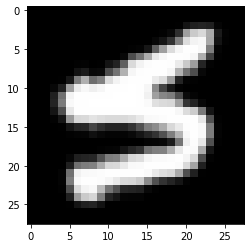

In [242]:
if datasetChoose == 1:
    print("Label entry 42:", labelDict[sample_label])
    plt.imshow(sample_image.values.reshape(28, 28), cmap=plt.cm.gray)
    plt.show()


    def fixImage(image):
        image = image.reshape(28, 28)
        image = np.fliplr(image)
        image = np.rot90(image)
        return image
else:
    print("Label entry 42:", sample_label)
    img = plt.imread('data2/'+sample_image)
    imgplot = plt.imshow(img, cmap=plt.cm.gray)
    plt.show()
    def fixImage(image):
        image = cv2.resize(image,(64, 64))

        return image

Label entry 42: N


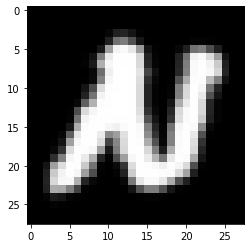

In [243]:
if datasetChoose == 1:
    print("Label entry 42:", labelDict[sample_label])
    plt.imshow(fixImage(sample_image.values), cmap=plt.cm.gray)
    plt.show()
else:
    print("Label entry 42:", sample_label)
    img = plt.imread('data2/'+sample_image)
    imgplot = plt.imshow(fixImage(img), cmap=plt.cm.gray)
    plt.show()

In [244]:
if datasetChoose == 1:
    xTrain = np.apply_along_axis(fixImage, 1, xTrain.values)
    xTest = np.apply_along_axis(fixImage, 1, xTest.values)
    xTrain.shape, xTest.shape
else:
    pass

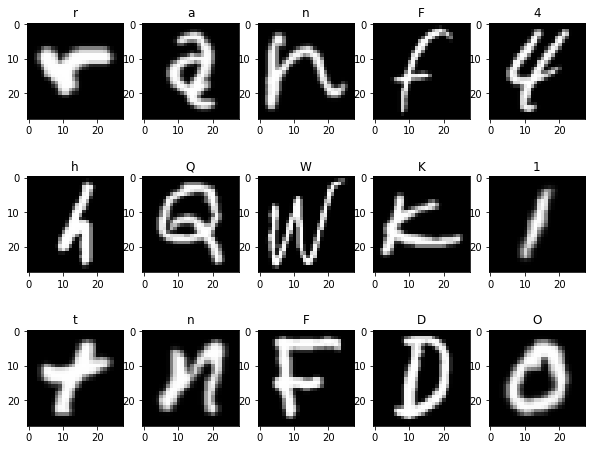

In [245]:
if datasetChoose == 1:
    fig,axes = plt.subplots(3,5,figsize=(10,8))
    for i,ax in enumerate(axes.flat):
        ax.imshow(xTrain[i].reshape([28,28]),cmap=plt.cm.gray)
        ax.set_title(labelDict[yTrain[i]])
else:
    fig,axes = plt.subplots(3,5,figsize=(10,8))
    for i,ax in enumerate(axes.flat):
        img = plt.imread('data2/'+traindF2.iloc[i][0])
        ax.imshow(fixImage(img), cmap=plt.cm.gray)
        ax.set_title(traindF2.iloc[i][1])

In [246]:
if datasetChoose == 1:
    xTrain = xTrain.astype('float32') / 255
    xTest = xTest.astype('float32') / 255


    classCount = len(labelDict)

    yTrain = np_utils.to_categorical(yTrain, classCount)
    yTest = np_utils.to_categorical(yTest, classCount)

    xTrain = xTrain.reshape(-1, 28, 28, 1)
    xTest = xTest.reshape(-1, 28, 28, 1)

    
    
    print(xTrain.shape, xTest.shape)
else:
    pass

(112800, 28, 28, 1) (18800, 28, 28, 1)


In [247]:
if datasetChoose == 1:
    print(yTrain, yTest)
else:
    pass

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [248]:
if datasetChoose == 1:
    # Split 30% for validation 
    xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size= 0.3,train_size=0.7, random_state=88)
else:
    print(traindF2.head())
    print(traindF2.shape)
    traindF2, valdF2 = train_test_split(traindF2, test_size=0.3, train_size=0.7, random_state=88)
    print(traindF2.head())
    print(traindF2.shape)
    print(valdF2.head())
    print(valdF2.shape)

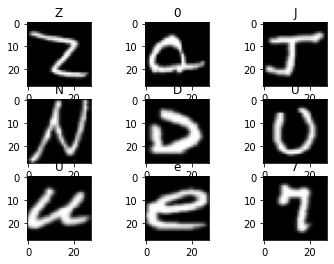

In [249]:
batch_size = 16

if datasetChoose == 1:

    trainDatagen = ImageDataGenerator( 
        zoom_range=0.2,
        shear_range=0.15,
        horizontal_flip=False,
        fill_mode="nearest"
    )

    trainGen = trainDatagen.flow(xTrain, 
                                yTrain, 
                                batch_size = batch_size,
                                seed=88,
                                shuffle=True)


    valDatagen = ImageDataGenerator(
    )


    valGen = valDatagen.flow(xVal, 
                            yVal, 
                            batch_size = batch_size,
                            seed=88,
                            shuffle=False)


    testGen= valDatagen.flow(xTest, 
                            yTest, 
                            batch_size = batch_size,
                            seed=88,
                            shuffle=False)


    for i in range(9):
        plt.subplot(330 + 1 + i)
        batch = trainGen.next()
        labelIndex = list(batch[1][i].flatten()).index(1)
        image = batch[0][i]

        plt.imshow(image,cmap=plt.cm.gray)
        plt.title(labelDict[labelIndex])
else:
    
    def reverseImage(image):
        image = 1-image
        #hsv_image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
        return image
    
    trainImageGen = ImageDataGenerator(
        rescale=1./255,
       # brightness_range=(0.4,1.5), 
        fill_mode='nearest', 
        #zoom_range=0.2,
        shear_range=0.2,
        preprocessing_function = reverseImage)
    
    

    trainGen = trainImageGen.flow_from_dataframe(dataframe = traindF2,
                                              directory = 'data2',
                                              x_col = "image",
                                              y_col = "label",
                                              batch_size = batch_size,
                                              seed=88,
                                              shuffle=True,
                                              class_mode = "categorical",
                                              target_size = (64,64),
                                              color_mode='grayscale')



    valImageGen = ImageDataGenerator(
        rescale=1./255,
        preprocessing_function = reverseImage
    )

    valGen = valImageGen.flow_from_dataframe(dataframe = valdF2,
                                                  directory = 'data2',
                                                  x_col = "image",
                                                  y_col = "label",
                                                  batch_size = batch_size,
                                                  seed=88,
                                                  shuffle=False,
                                                  class_mode = "categorical",
                                                  target_size = (64,64),
                                                  color_mode='grayscale')

##CLASSES MUST BE==62

    testGen = valImageGen.flow_from_dataframe(dataframe = testdF2,
                                                  directory = 'data2',
                                                  x_col = "image",
                                                  y_col = "label",
                                                  batch_size = batch_size,
                                                  seed=88,
                                                  shuffle=False,
                                                  class_mode = "categorical",
                                                  target_size = (64,64),
                                                  color_mode='grayscale')
    for i in range(9):
        plt.subplot(330 + 1 + i)
        batch = trainGen.next()
       # print(batch)
        #labelIndex = list(batch[1][i]).index(1)
        image = batch[0][i]
        plt.imshow(image,cmap=plt.cm.gray)
        #plt.title(traindF2.iloc[label]['label'])


In [250]:
if datasetChoose == 1:

    inputShape = (28,28,1)
    model = Sequential()

    model.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=inputShape))
    model.add(layers.MaxPool2D(pool_size=2))
    model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
    model.add(layers.MaxPool2D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(classCount, activation='softmax'))

    model.summary()
else:
    
    inputShape = (64,64,1)
    model = Sequential()

    model.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=inputShape))
    model.add(layers.MaxPool2D(pool_size=2))
    model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
    model.add(layers.MaxPool2D(pool_size=2))
    model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
    model.add(layers.MaxPool2D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(62, activation='softmax'))

    model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_41 (Dense)             (None, 128)             

In [251]:
optimizer = 'adam'
optimizerTwo = 'rmsprop'
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
if datasetChoose == 1:
    mcp_save = ModelCheckpoint('my_model.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')
else:
    mcp_save = ModelCheckpoint('my_model2.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')


Epoch 1/30
4935/4935 [==============================] - 46s 9ms/step - loss: 0.7664 - accuracy: 0.7547 - val_loss: 0.1105 - val_accuracy: 0.8353

Epoch 00001: val_loss improved from inf to 0.11049, saving model to my_model.h5
Epoch 2/30
4935/4935 [==============================] - 48s 10ms/step - loss: 0.4592 - accuracy: 0.8376 - val_loss: 0.0992 - val_accuracy: 0.8383

Epoch 00002: val_loss improved from 0.11049 to 0.09920, saving model to my_model.h5
Epoch 3/30
4935/4935 [==============================] - 49s 10ms/step - loss: 0.3962 - accuracy: 0.8558 - val_loss: 0.0663 - val_accuracy: 0.8586

Epoch 00003: val_loss improved from 0.09920 to 0.06633, saving model to my_model.h5
Epoch 4/30
4935/4935 [==============================] - 48s 10ms/step - loss: 0.3593 - accuracy: 0.8658 - val_loss: 0.1046 - val_accuracy: 0.8617

Epoch 00004: val_loss did not improve from 0.06633
Epoch 5/30
4935/4935 [==============================] - 49s 10ms/step - loss: 0.3362 - accuracy: 0.8735 - val_loss

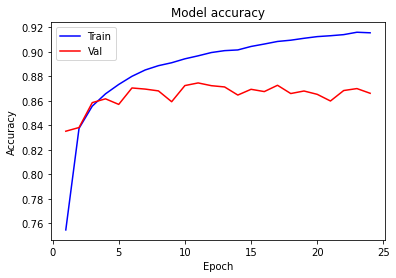

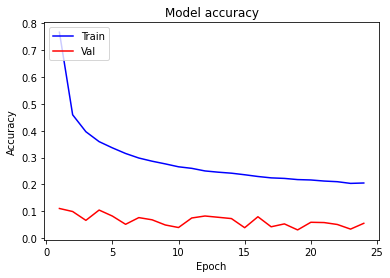

4935/4935 [==============================] - 21s 4ms/step
[0.11777336895465851, 0.9208966493606567]


In [252]:
history = model.fit(trainGen,
                    validation_data = valGen,
                    batch_size=None, 
                    epochs=30, 
                    verbose=1, 
                    callbacks=[early_stopping, mcp_save])

def plotgraph(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

plotgraph(epochs, acc, val_acc)

plotgraph(epochs, loss, val_loss)

evaluate = model.evaluate(trainGen)
print(evaluate)

In [226]:
if datasetChoose == 1:
    model = load_model('my_model.h5')
    model.summary()

    evaluate = model.evaluate(valGen)
    print(evaluate)

    evaluate = model.evaluate(testGen)
    print(evaluate)


    evaluate = model.evaluate(trainGen)
    print(evaluate)

    predictions = model.predict(xTest)
    print("predictions shape:", predictions.shape)
else:
    model = load_model('my_model2.h5')
    model.summary()

    evaluate = model.evaluate(valGen)
    print(evaluate)

    evaluate = model.evaluate(testGen)
    print(evaluate)


    evaluate = model.evaluate(trainGen)
    print(evaluate)

    predictions = model.predict(testGen)
    print("predictions shape:", predictions.shape)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 2304)            